Installation de Selenium

In [2]:
#!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
#!sudo apt-get update
#!sudo -E apt-get install -y /tmp/chrome.deb
#!pip install chromedriver-autoinstaller selenium

In [3]:
import chromedriver_autoinstaller

chromedriver_autoinstaller.install() 

'/opt/mamba/lib/python3.10/site-packages/chromedriver_autoinstaller/108/chromedriver'

In [7]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')

driver = webdriver.Chrome("chromedriver", options=chrome_options)

In [8]:
driver.get('https://ciqual.anses.fr/')

In [9]:
select_french = driver.find_element("xpath", "//*[@id='fr-switch']")
ActionChains(driver).move_to_element(select_french).click()

In [10]:
research_bar = driver.find_element("xpath", "//input[@id='champ-recherche']")
research_bar.send_keys("Tomate")

search_button = driver.find_element("xpath", "//a[@id='loupe']")
search_button.click()

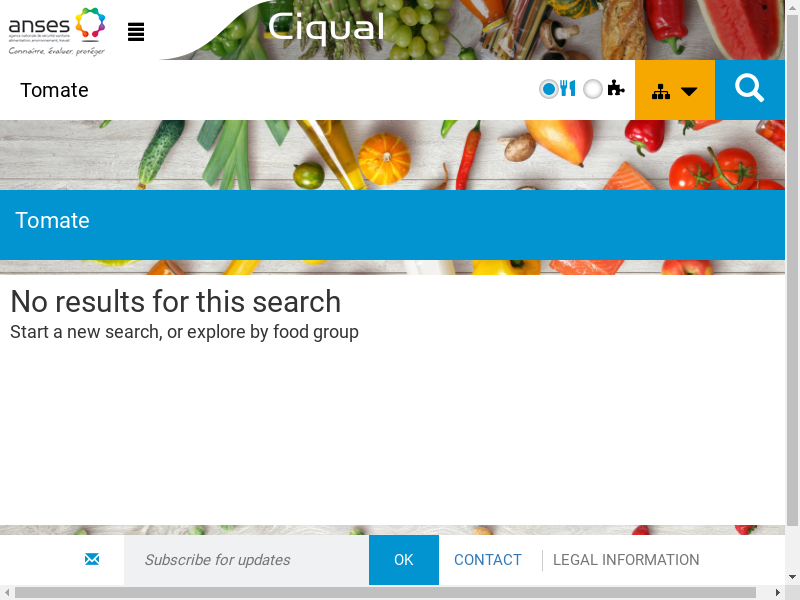

In [11]:
png = driver.get_screenshot_as_png()
from IPython.display import Image
Image(png, width='500')

Ok le problème c'est que le driver va direct sur le site en anglais donc quand je tape "Tomate" il ne trouve rien. J'ai essayé de cliquer sur la version française mais pour l'instant ça ne marche pas. J'ai demandé à Avouac il va regarder.

A partir de maintenant, je fais comme si j'étais sur la page de l'ingrédient (ex : oeuf) et je récupère les données nutritionnelles. 

In [10]:
driver.get('https://ciqual.anses.fr/#/aliments/22050//quail-egg-raw')

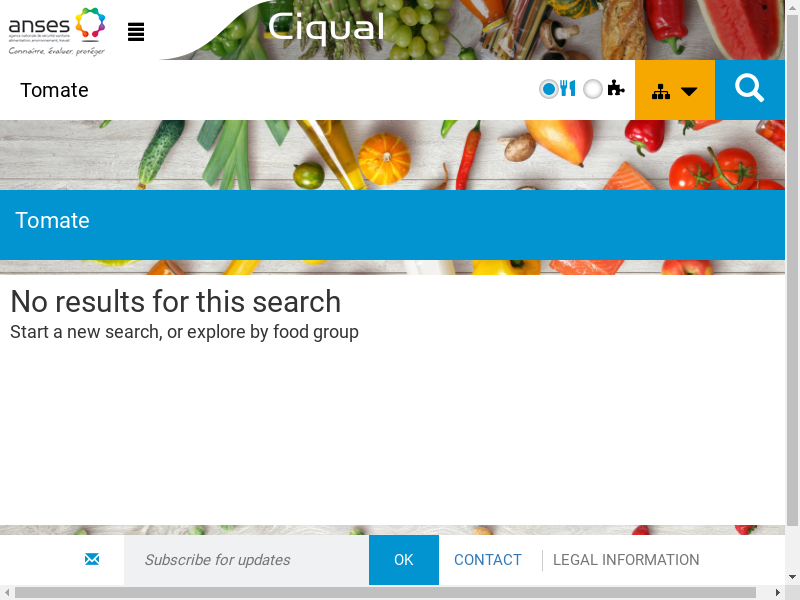

In [11]:
png = driver.get_screenshot_as_png()
from IPython.display import Image
Image(png, width='500')

In [12]:
search = driver.find_elements("xpath", "//td")

liste = [] 
n = 0 
for result in search :
    texte = result.text
    if n%5 == 0 and texte != "":  
        #print(texte)
        liste.append(texte)
    if n%5 == 1 and texte != "" : 
        #print(texte)
        liste.append(float(texte.replace(',','.')))
    n += 1 

liste

[]